In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from eval import *
import pandas as pd
import numpy as np

In [3]:
def get_data(path_real, path_fake, real_sep=';', fake_sep=',', drop_columns=None):
    real = pd.read_csv(path_real, sep=real_sep, low_memory=False)
    fake = pd.read_csv(path_fake, sep=fake_sep, low_memory=False)
    shared_min = min(len(fake), len(real))
    real = real.sample(shared_min)
    fake = fake.sample(shared_min)
    if set(fake.columns.tolist()).issubset(set(real.columns.tolist())):
        real = real[fake.columns]
    elif drop_columns is not None:
        real = real.drop(drop_columns, axis=1)
        try:
            fake = fake.drop(drop_columns, axis=1)
        except:
            print(f'Some of {drop_columns} were not found on real.index.')
        assert len(fake.columns.tolist()) == len(real.columns.tolist()), f'Real and fake do not have same nr of columns: {len(fake.columns)} and {len(real.columns)}'
        fake.columns = real.columns
    else:
        fake.columns = real.columns
        
    for col in fake.columns:
        fake[col] = fake[col].astype(real[col].dtype)
    return real, fake

## Dia Samples

In [ ]:
real
tgan_org_evaluator.fake
wgan_evaluator.fake
skip_evaluator.fake
medgan_evaluator.fake
tablegan_evaluator.fake

In [ ]:
sample_tgan = tgan_org_evaluator.fake.sample(50)
sample_tgan['model'] = 'tgan'

sample_wgan = wgan_evaluator.fake.sample(50)
sample_wgan['model'] = 'wgan'

sample_skip = skip_evaluator.fake.sample(50)
sample_skip['model'] = 'skip'

sample_medgan = medgan_evaluator.fake.sample(50)
sample_medgan['model'] = 'medgan'

sample_tablegan = tablegan_evaluator.fake.sample(50)
sample_tablegan['model'] = 'tablegan'

total_sample = pd.concat([sample_tgan, sample_wgan, sample_skip, sample_medgan, sample_tablegan])
total_sample['real'] = None
total_sample = total_sample.sort_values('trans_date')
# num_cols = total_sample._get_numeric_data().columns.tolist()
# total_sample[num_cols] = total_sample[num_cols].astype('int')
total_sample = total_sample[total_sample.trans_amount > 0]
total_sample

In [32]:
total_sample = total_sample.round({'trans_amount': 1, 'balance_after_trans': 1})

In [33]:
tar_dir = '../final_data/dia_samples'
for name in ['v1', 'v2', 'v3', 'v4', 'v5']:
    g = total_sample.sample(50).sort_values('trans_date')
#     num_cols = g._get_numeric_data().columns.tolist()
#     g[num_cols] = g[num_cols].astype('int')
    g.to_csv(f'{tar_dir}/sample_{name}_ground_truth.csv', index=False, sep=';')
    g.drop(['model'], axis=1).to_csv(f'{tar_dir}/sample_{name}.csv', index=False, sep=';')

In [12]:
berka_real = pd.read_csv('../data/berka/berka_cat.csv', sep=';')

C:\Users\C64062\anaconda3\envs\fastai\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
berka_sample = berka_real.sample(50).drop(['trans_bank_partner', 'trans_account_partner'], axis=1).sort_values('trans_date')
berka_sample.head()

,trans_id,account_id,trans_amount,balance_after_trans,trans_type,trans_operation,trans_k_symbol,trans_date
14053,193374,655,14.6,42460.8,WITHDRAWAL,WITHDRAWAL_IN_CASH,PAYMENT_FOR_STATEMENT,272
44255,185206,628,4543.0,24705.1,CREDIT,CREDIT_IN_CASH,UNKNOWN,431
89345,788247,2687,3830.0,27822.6,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK,HOUSEHOLD,621
114825,857875,2924,5100.0,29689.1,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,713
120072,3094834,10266,6000.0,68292.3,WITHDRAWAL,WITHDRAWAL_IN_CASH,UNKNOWN,730


In [23]:
berka_sample.to_csv('../final_data/dia_samples/berka_real.csv', index=False, sep=';')

# Berka

## Original TGAN

In [4]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan.csv')
tgan_org_evaluator = DataEvaluator(real, fake)

In [23]:
tgan_org_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7988 0.7956
real_data_RandomForestClassifier_F1 0.9852 0.9833
real_data_DecisionTreeClassifier_F1 0.9761 0.9576
real_data_MLPClassifier_F1          0.7904 0.6010
fake_data_LogisticRegression_F1     0.7938 0.7916
fake_data_RandomForestClassifier_F1 0.9808 0.9810
fake_data_DecisionTreeClassifier_F1 0.9685 0.9667
fake_data_MLPClassifier_F1          0.7697 0.5994

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0244
Column Correlation distance MAE   0.0184
Duplicate rows between sets       0.0000
nearest neighbor mean             0.2745
nearest neighbor std              0.2044

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9789
Correlation column correlations                 0.9956
Mean Correlation between fake

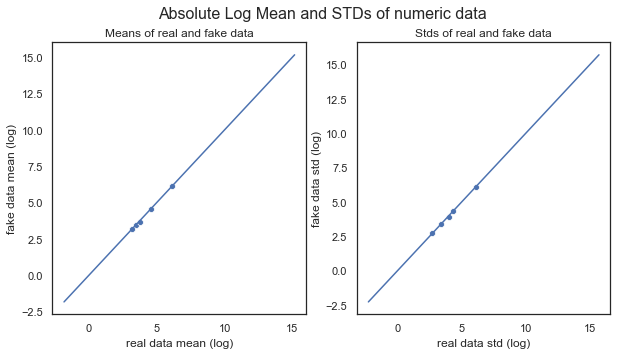

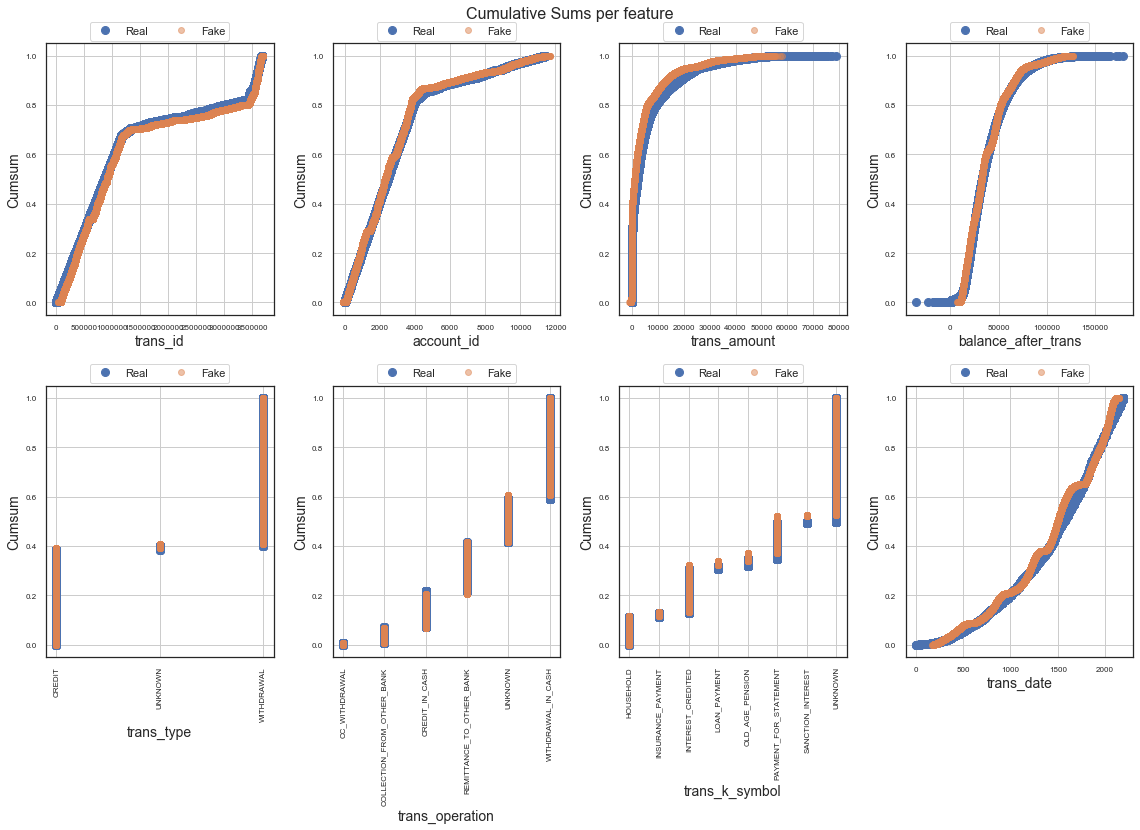

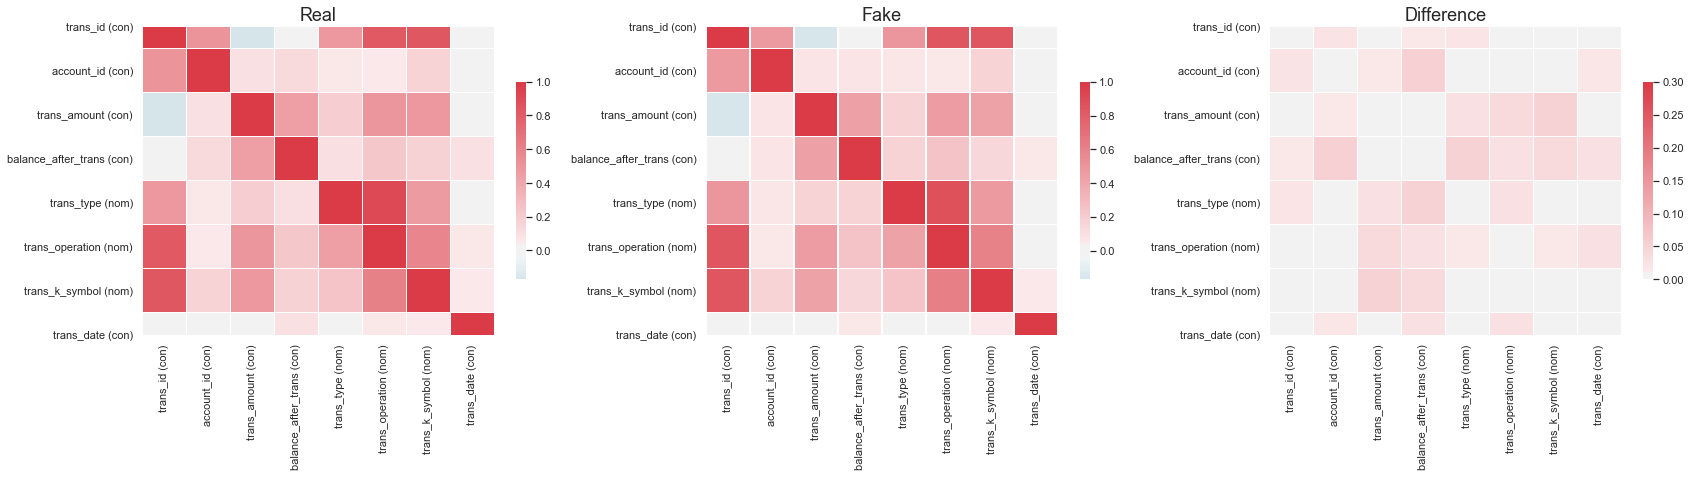

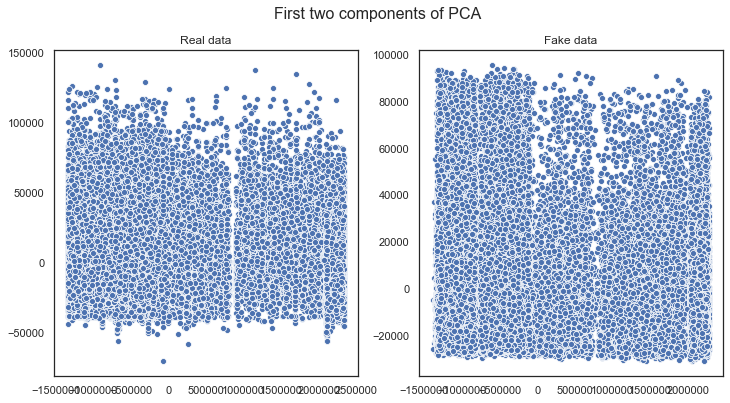

In [37]:
tgan_org_evaluator.visual_evaluation(annot=False)

## WGAN-GP

In [24]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-wgan-gp.csv')
wgan_evaluator = DataEvaluator(real, fake)

In [25]:
wgan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7932 0.7778
real_data_RandomForestClassifier_F1 0.9832 0.9719
real_data_DecisionTreeClassifier_F1 0.9745 0.9126
real_data_MLPClassifier_F1          0.6011 0.6005
fake_data_LogisticRegression_F1     0.7247 0.7292
fake_data_RandomForestClassifier_F1 0.9248 0.9398
fake_data_DecisionTreeClassifier_F1 0.9145 0.9085
fake_data_MLPClassifier_F1          0.6003 0.6003

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0883
Column Correlation distance MAE   0.0619
Duplicate rows between sets       0.0000
nearest neighbor mean             0.3402
nearest neighbor std              0.3112

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                1.0000
Correlation column correlations                 0.9594
Mean Correlation between fake

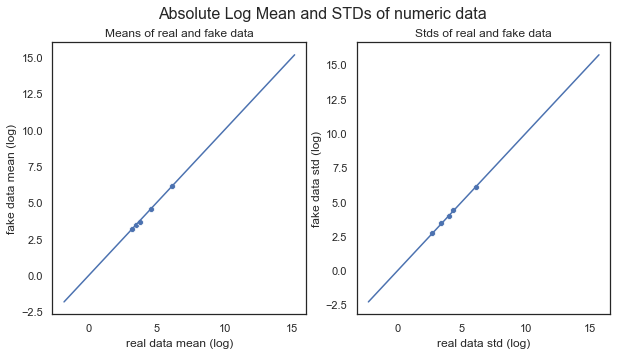

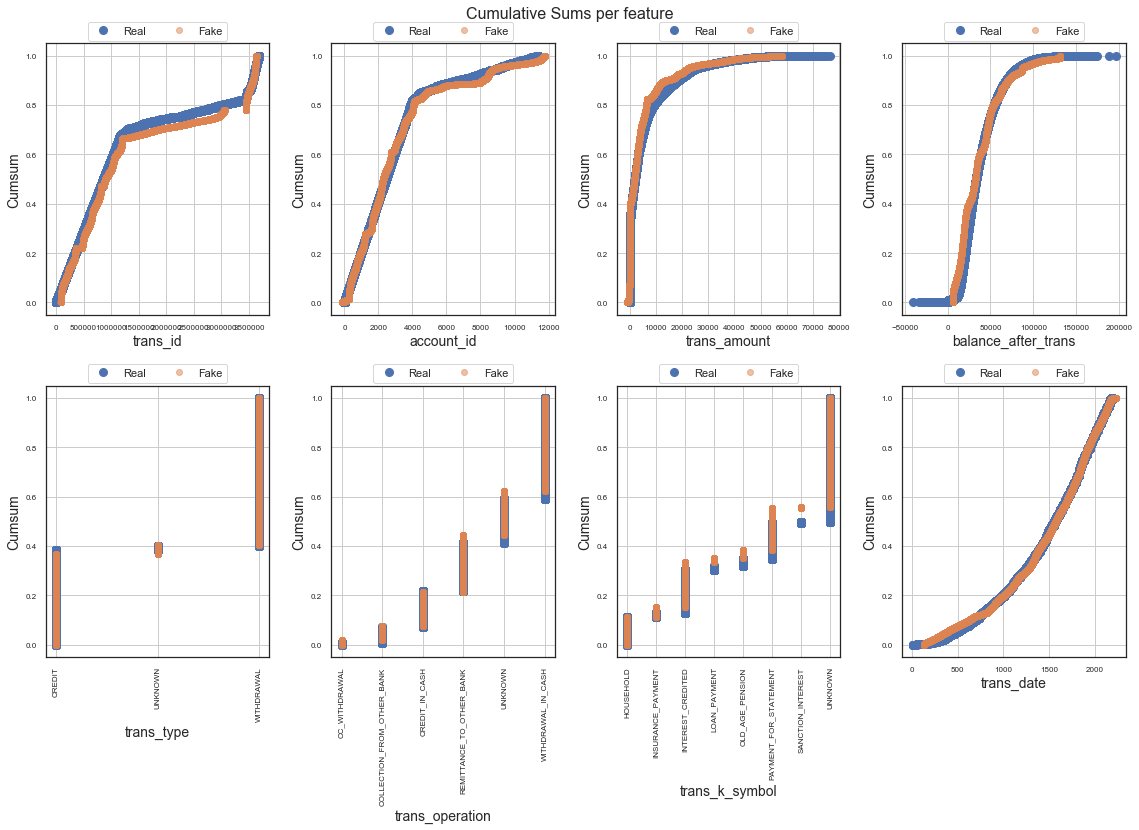

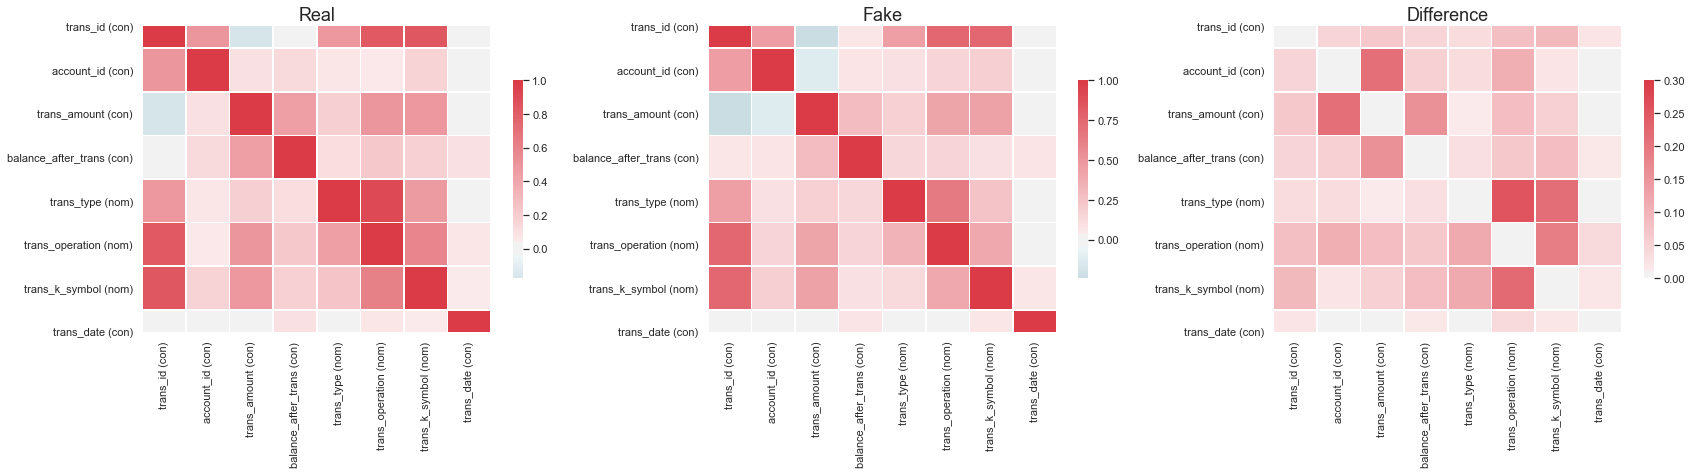

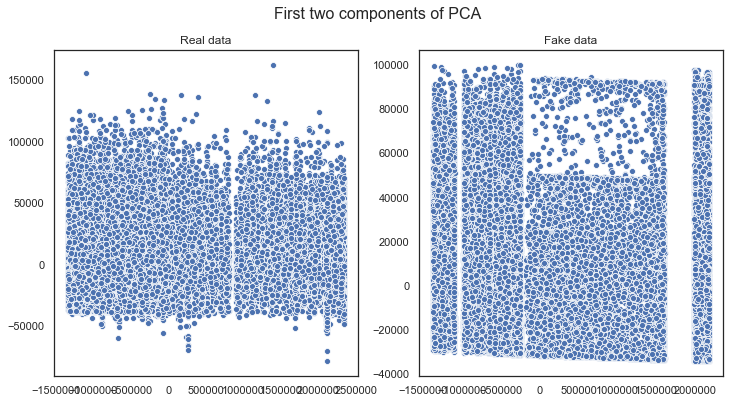

In [40]:
wgan_evaluator.visual_evaluation(annot=False)

## TGAN Skip Connections

In [26]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/berka_sample_tgan-skip-connections.csv')
skip_evaluator = DataEvaluator(real, fake)

In [27]:
skip_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7937 0.7861
real_data_RandomForestClassifier_F1 0.9841 0.9829
real_data_DecisionTreeClassifier_F1 0.9740 0.9326
real_data_MLPClassifier_F1          0.5976 0.5905
fake_data_LogisticRegression_F1     0.7186 0.7469
fake_data_RandomForestClassifier_F1 0.9696 0.9702
fake_data_DecisionTreeClassifier_F1 0.9593 0.9460
fake_data_MLPClassifier_F1          0.5668 0.5666

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.0407
Column Correlation distance MAE   0.0288
Duplicate rows between sets       0.0000
nearest neighbor mean             0.2935
nearest neighbor std              0.2206

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9579
Correlation column correlations                 0.9939
Mean Correlation between fake

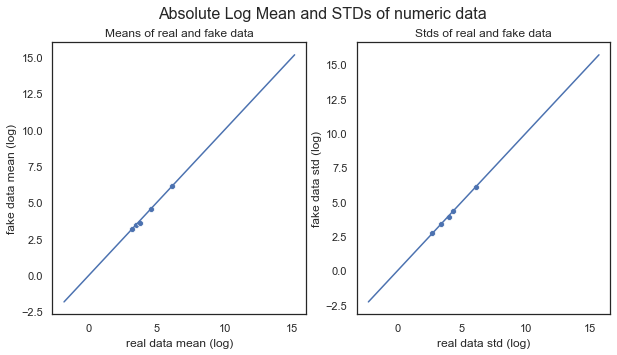

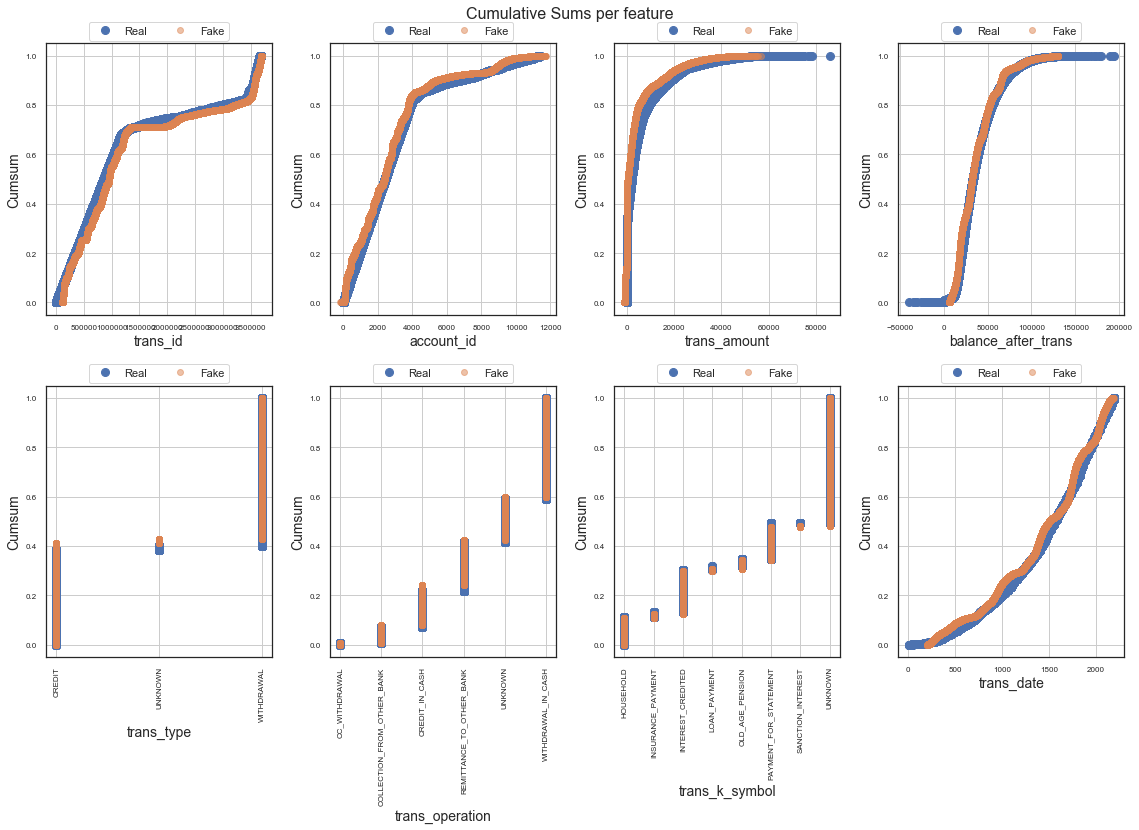

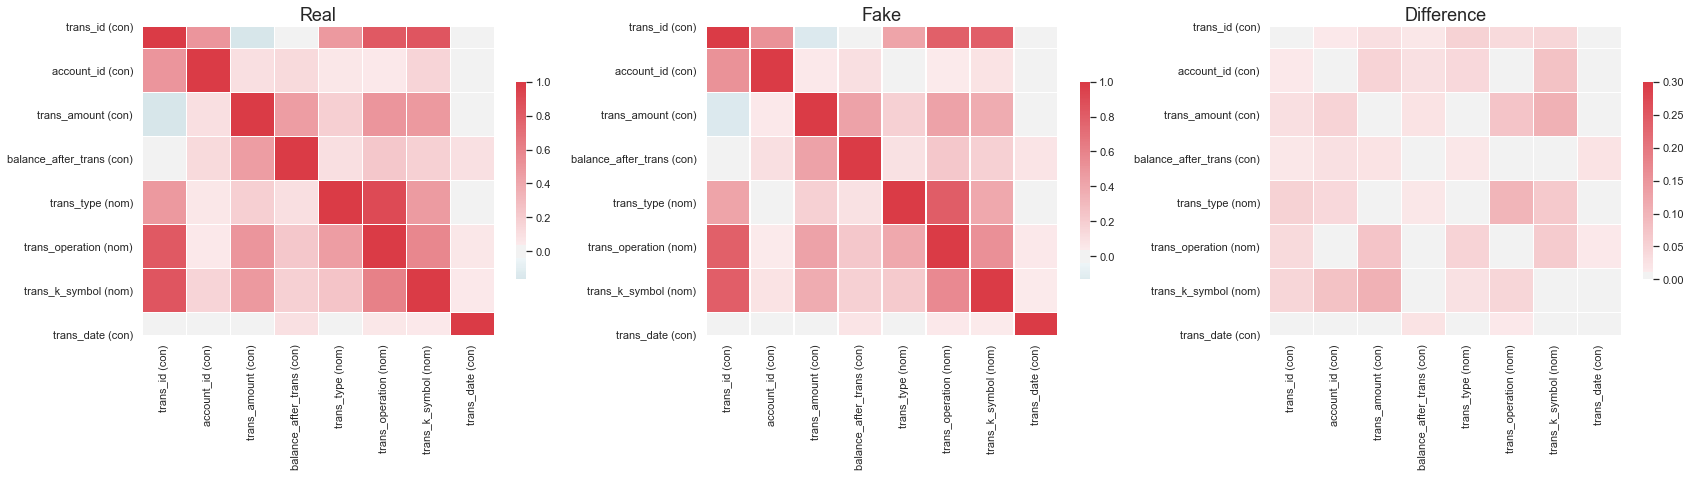

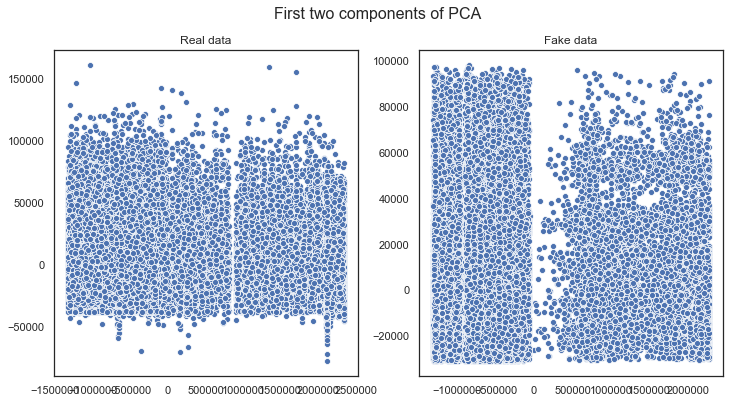

In [43]:
skip_evaluator.visual_evaluation(annot=False)

## MedGAN

In [28]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_medgan_100.csv')
medgan_evaluator = DataEvaluator(real, fake)

In [29]:
medgan_evaluator.n_samples

100000

In [11]:
medgan_evaluatorator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.8010 0.7550
real_data_RandomForestClassifier_F1 0.9830 0.8347
real_data_DecisionTreeClassifier_F1 0.9748 0.9083
real_data_MLPClassifier_F1          0.5981 0.4748
fake_data_LogisticRegression_F1     0.1702 0.8636
fake_data_RandomForestClassifier_F1 0.9831 0.9980
fake_data_DecisionTreeClassifier_F1 0.9642 0.9980
fake_data_MLPClassifier_F1          0.8298 0.8590

Miscellaneous results:
                                     Result
Column Correlation Distance RMSE     0.2259
Column Correlation distance MAE      0.1784
Duplicate rows between sets      7,563.0000

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.7579
Correlation column correlations                 0.7655
Mean Correlation between fake and real columns  0.5661
Mean correlation classifier F1              

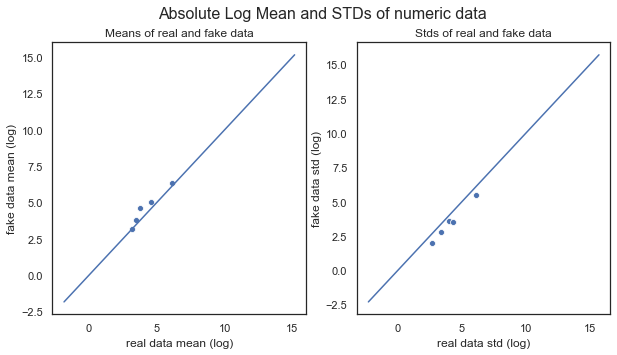

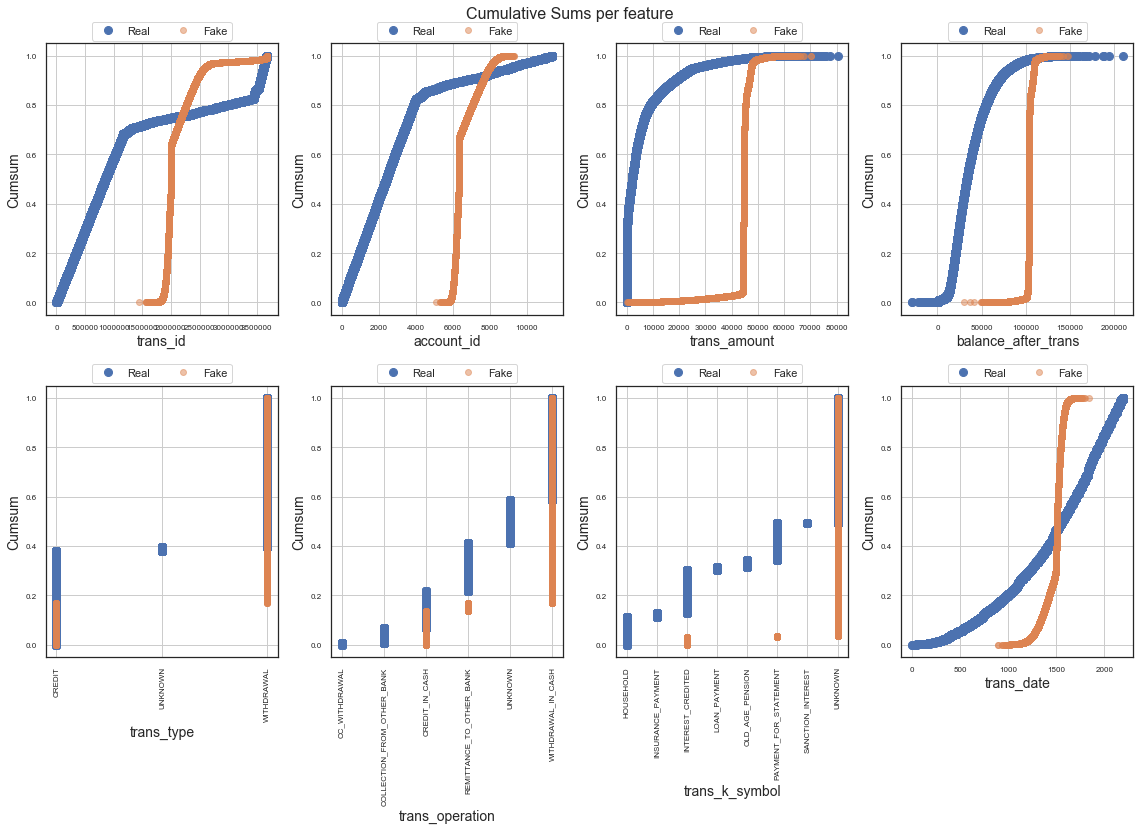

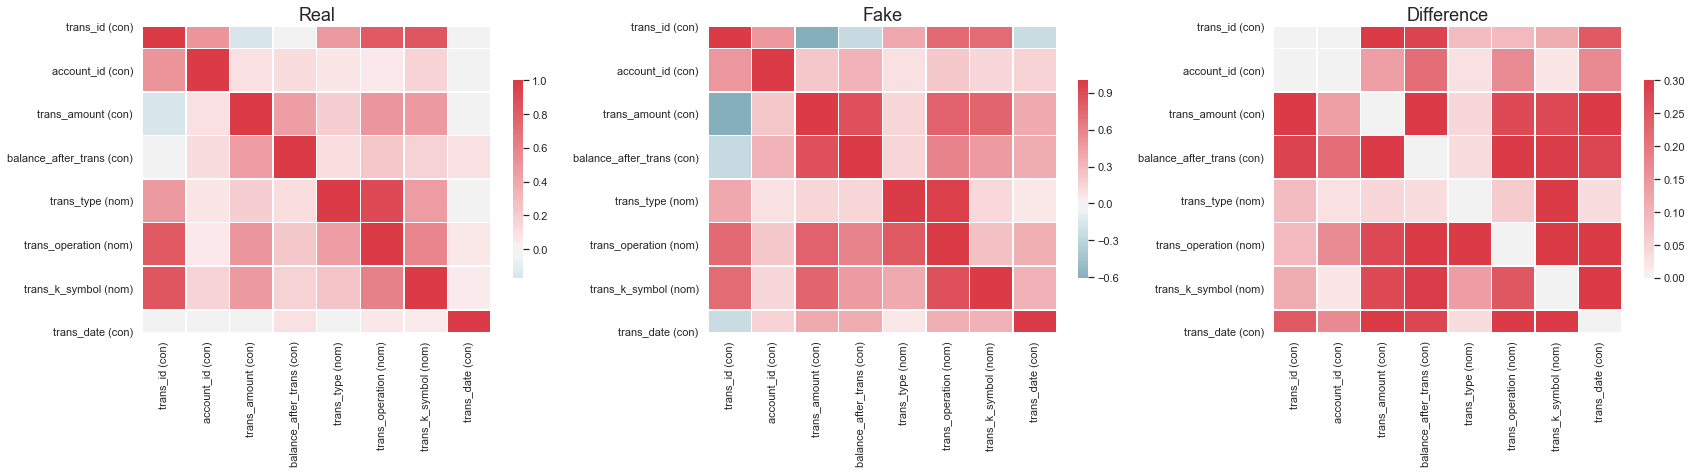

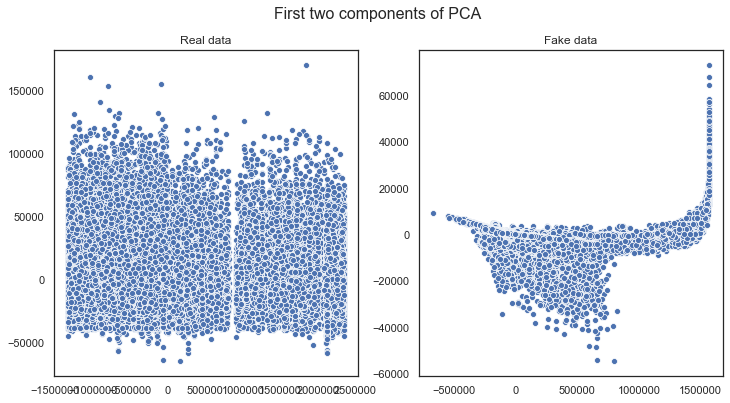

In [46]:
medgan_evaluator.visual_evaluation(annot=False)

## TableGAN

In [30]:
real, fake = get_data('../data/berka/berka_cat.csv', '../final_data/berka/sample_berka_tablegan_100.csv')
tablegan_evaluator = DataEvaluator(real, fake)

In [31]:
tablegan_evaluator.evaluate(target_col='trans_type', verbose=False)


Correlation metric: pearsonr


C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\bauke\Anaconda3\envs\fastai\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



Classifier F1-scores:
                                      real   fake
real_data_LogisticRegression_F1     0.7997 0.7815
real_data_RandomForestClassifier_F1 0.9850 0.9264
real_data_DecisionTreeClassifier_F1 0.9761 0.8889
real_data_MLPClassifier_F1          0.6001 0.6001
fake_data_LogisticRegression_F1     0.7144 0.7009
fake_data_RandomForestClassifier_F1 0.8117 0.9074
fake_data_DecisionTreeClassifier_F1 0.8072 0.8815
fake_data_MLPClassifier_F1          0.6278 0.6290

Miscellaneous results:
                                  Result
Column Correlation Distance RMSE  0.2131
Column Correlation distance MAE   0.1284
Duplicate rows between sets       0.0000
nearest neighbor mean             0.4940
nearest neighbor std              0.4465

Results:
Number of duplicate rows is ignored for total score.
                                                Result
basic statistics                                0.9684
Correlation column correlations                 0.6248
Mean Correlation between fake

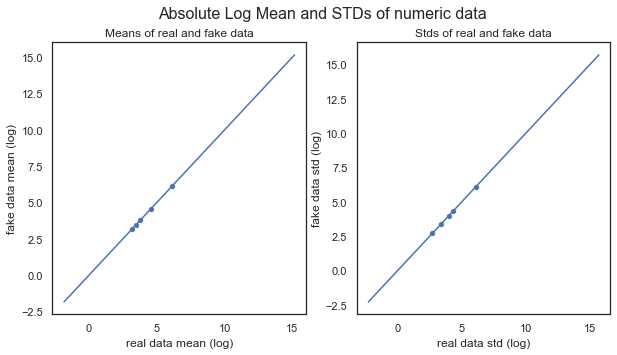

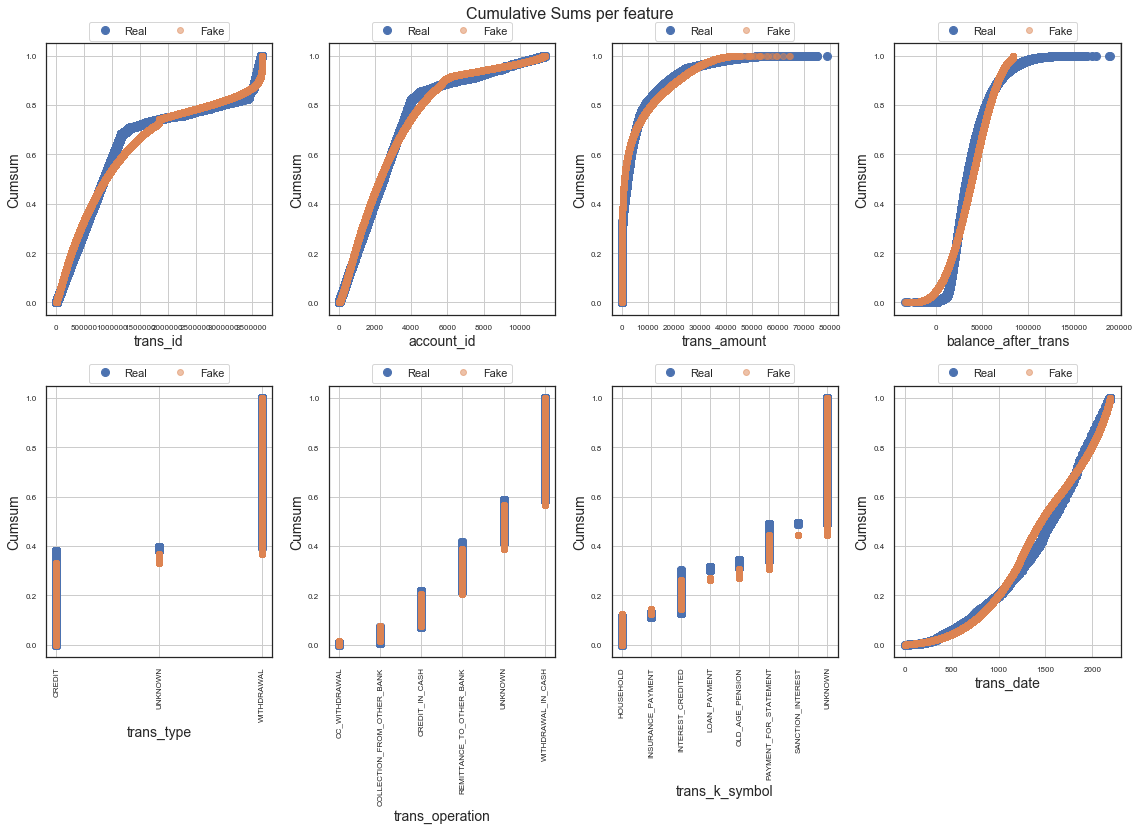

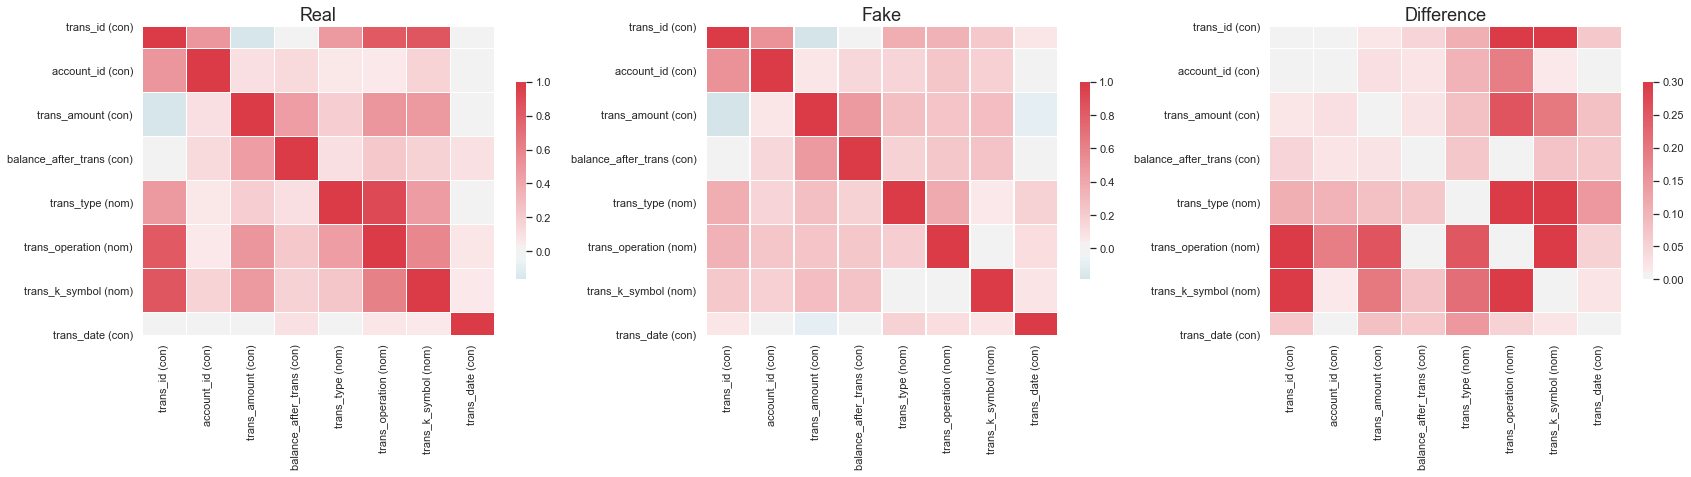

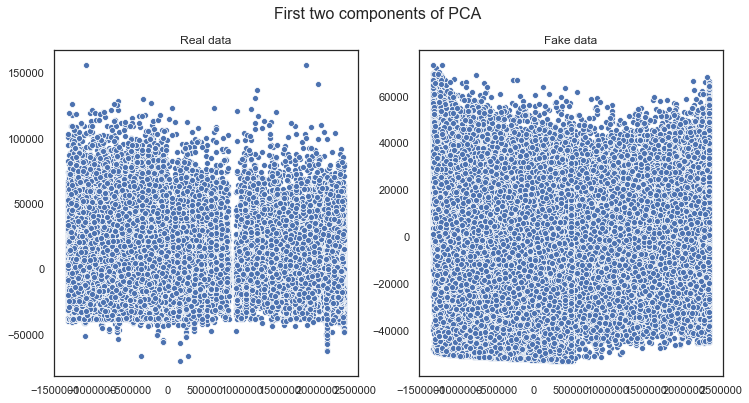

In [49]:
tablegan_evaluator.visual_evaluation(annot=False)

## Feature Importance

In [53]:
target_col = 'trans_type'
x = numerical_encoding(fake.drop([target_col], axis=1), nominal_columns=tgan_org_evaluator.categorical_columns)

[1.36118739e-02 1.80709275e-02 5.65192718e-02 1.27780790e-02
 7.40933427e-02 5.33174802e-02 2.66024432e-03 7.71583467e-02
 1.26159032e-03 3.56396927e-02 1.73414677e-02 7.66633099e-05
 8.09876193e-03 2.56549043e-03 7.60614708e-02 2.42695190e-01
 3.06023938e-02 1.46246227e-01 1.31201485e-01]
Index(['trans_id', 'account_id', 'trans_amount', 'balance_after_trans',
       'trans_operation_CC_WITHDRAWAL',
       'trans_operation_COLLECTION_FROM_OTHER_BANK',
       'trans_operation_CREDIT_IN_CASH',
       'trans_operation_REMITTANCE_TO_OTHER_BANK', 'trans_operation_UNKNOWN',
       'trans_operation_WITHDRAWAL_IN_CASH', 'trans_k_symbol_HOUSEHOLD',
       'trans_k_symbol_INSURANCE_PAYMENT', 'trans_k_symbol_INTEREST_CREDITED',
       'trans_k_symbol_LOAN_PAYMENT', 'trans_k_symbol_OLD_AGE_PENSION',
       'trans_k_symbol_PAYMENT_FOR_STATEMENT',
       'trans_k_symbol_SANCTION_INTEREST', 'trans_k_symbol_UNKNOWN',
       'trans_date'],
      dtype='object')
[11  8 13  6 12  3  0 10  1 16  9  5  2  

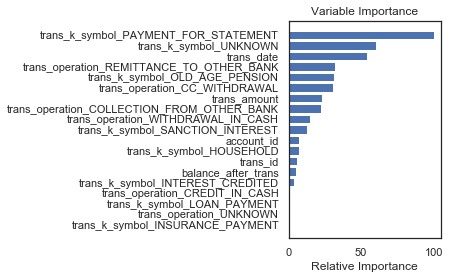

In [54]:
feature_importance = tgan_org_evaluator.f_estimators[2].feature_importances_
print(feature_importance)
# feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
print(column_names)
print(sorted_idx)
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

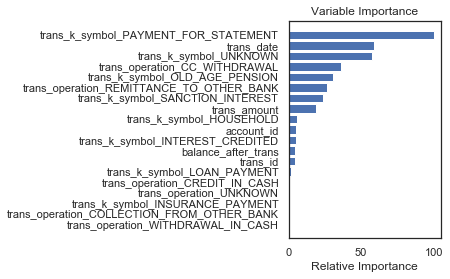

In [55]:
feature_importance = tgan_org_evaluator.r_estimators[2].feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
column_names = x.columns
plt.yticks(pos, column_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()